# Support Vector Classifier (without Under or Over sampling)

In [2]:
import numpy as np
import pandas as pd
from src import model_results

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.drop('Time',axis=1,inplace=True)

In [6]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Split and Scale data (Amount column) for SVM

- Applying train-test-split before scaling X_train and X_test 'Amount' column
- Scale X_train and X_test separately
- This is to avoid data leakage (as oppose to scaling before splitting)

In [7]:
X = df.drop('Class',axis=1)
y = df['Class']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 111)

In [10]:
from sklearn.preprocessing import scale

In [11]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
64454,-3.538816,3.481893,-1.827130,-0.573050,2.644106,-0.340988,2.102135,-2.939006,2.578654,3.155261,...,1.345904,0.530978,-0.860677,-0.201810,-1.719747,0.729143,-0.547993,-0.023636,-0.454966,1.00
37906,-0.363913,0.853399,1.648195,1.118934,0.100882,0.423852,0.472790,-0.972440,0.033833,0.629036,...,-0.192932,0.687055,-0.094586,0.121531,0.146830,-0.944092,-0.558564,-0.186814,-0.257103,18.49
79378,1.193021,-0.136714,0.622612,0.780864,-0.823511,-0.706444,-0.206073,-0.016918,0.781531,-0.185059,...,-0.178761,-0.310405,-0.842028,0.085477,0.366005,0.254443,0.290002,-0.036764,0.015039,23.74
245686,1.604032,-0.808208,-1.594982,0.200475,0.502985,0.832370,-0.034071,0.234040,0.550616,-0.051983,...,-0.040448,0.519029,1.429217,-0.139322,-1.293663,0.037785,0.061206,0.005387,-0.057296,156.52
60943,-2.669614,-2.734385,0.662450,-0.059077,3.346850,-2.549682,-1.430571,-0.118450,0.469383,-0.185599,...,-0.430295,-0.228329,-0.370643,-0.211544,-0.300837,-1.174590,0.573818,0.388023,0.161782,57.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105747,1.222065,-0.557475,0.231881,-0.054993,-0.516954,0.277267,-0.428552,0.064469,-1.007380,0.721892,...,-0.423128,-0.432976,-0.627235,-0.038963,-0.270258,0.423935,0.395472,0.005571,0.003752,43.05
102486,-0.378726,0.176414,2.038723,1.075694,-0.216415,0.921706,0.055936,0.337719,0.397505,0.042557,...,0.027322,0.207481,0.801599,-0.158665,-0.340407,-0.327219,-0.132057,0.020642,-0.085085,49.00
135892,-2.201029,2.135296,-0.082015,-0.079166,-0.824369,-0.347833,-0.465664,1.384499,0.152787,-0.204262,...,0.104650,-0.222762,-0.569381,-0.039511,-0.459539,0.307848,0.316537,0.269799,0.147944,9.23
10196,-1.998332,-0.137916,2.196376,1.961751,-0.344791,0.764497,0.196137,0.123434,2.914590,0.208057,...,-0.258861,-0.854563,-0.761780,0.709752,-0.053680,0.139729,-0.383565,0.534322,0.071052,87.00


In [12]:
#Scale the Amount colmun for SVC (on training data)
X_train_scaled_amount = scale(X_train['Amount'])

In [13]:
#Replace the original 'Amount' column with scaled 'Amount'
X_train['Amount']=X_train_scaled_amount

C:\Users\Long Bing\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
#X_train 'Amount' is scaled
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
64454,-3.538816,3.481893,-1.827130,-0.573050,2.644106,-0.340988,2.102135,-2.939006,2.578654,3.155261,...,1.345904,0.530978,-0.860677,-0.201810,-1.719747,0.729143,-0.547993,-0.023636,-0.454966,-0.364820
37906,-0.363913,0.853399,1.648195,1.118934,0.100882,0.423852,0.472790,-0.972440,0.033833,0.629036,...,-0.192932,0.687055,-0.094586,0.121531,0.146830,-0.944092,-0.558564,-0.186814,-0.257103,-0.291617
79378,1.193021,-0.136714,0.622612,0.780864,-0.823511,-0.706444,-0.206073,-0.016918,0.781531,-0.185059,...,-0.178761,-0.310405,-0.842028,0.085477,0.366005,0.254443,0.290002,-0.036764,0.015039,-0.269644
245686,1.604032,-0.808208,-1.594982,0.200475,0.502985,0.832370,-0.034071,0.234040,0.550616,-0.051983,...,-0.040448,0.519029,1.429217,-0.139322,-1.293663,0.037785,0.061206,0.005387,-0.057296,0.286095
60943,-2.669614,-2.734385,0.662450,-0.059077,3.346850,-2.549682,-1.430571,-0.118450,0.469383,-0.185599,...,-0.430295,-0.228329,-0.370643,-0.211544,-0.300837,-1.174590,0.573818,0.388023,0.161782,-0.128344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105747,1.222065,-0.557475,0.231881,-0.054993,-0.516954,0.277267,-0.428552,0.064469,-1.007380,0.721892,...,-0.423128,-0.432976,-0.627235,-0.038963,-0.270258,0.423935,0.395472,0.005571,0.003752,-0.188823
102486,-0.378726,0.176414,2.038723,1.075694,-0.216415,0.921706,0.055936,0.337719,0.397505,0.042557,...,0.027322,0.207481,0.801599,-0.158665,-0.340407,-0.327219,-0.132057,0.020642,-0.085085,-0.163920
135892,-2.201029,2.135296,-0.082015,-0.079166,-0.824369,-0.347833,-0.465664,1.384499,0.152787,-0.204262,...,0.104650,-0.222762,-0.569381,-0.039511,-0.459539,0.307848,0.316537,0.269799,0.147944,-0.330374
10196,-1.998332,-0.137916,2.196376,1.961751,-0.344791,0.764497,0.196137,0.123434,2.914590,0.208057,...,-0.258861,-0.854563,-0.761780,0.709752,-0.053680,0.139729,-0.383565,0.534322,0.071052,-0.004875


In [15]:
#Scale the Amount colmun for SVC (on testng data)
X_test_scaled_amount = scale(X_test['Amount'])

In [16]:
#Replace the original 'Amount' column with scaled 'Amount'
X_test['Amount']=X_test_scaled_amount

C:\Users\Long Bing\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
#X_test 'Amount' is scaled
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
254469,-1.189404,-0.591269,-0.600846,3.512289,-1.390089,1.752359,2.374289,0.450939,-1.003577,-0.084505,...,0.969503,0.745457,1.095133,1.461693,0.589701,-0.209193,0.097121,-0.223566,0.092385,2.073851
121929,1.253168,-0.536514,0.010453,-2.002376,-0.675496,-0.765532,-0.155118,-0.136187,1.882972,-1.532621,...,0.002578,0.016080,0.425180,-0.274055,0.104499,0.954705,-0.672143,0.074562,0.009715,-0.232562
114879,-1.644384,0.233326,1.593087,-0.030053,1.026072,-1.067972,0.373123,-1.477697,0.415043,1.324159,...,-0.240111,0.391676,-0.420744,-0.276312,0.542789,-0.633719,-0.028573,-0.127075,-0.290045,-0.265498
81232,-0.636997,0.645736,0.269894,-0.538135,1.507577,4.108075,-0.988026,1.529162,0.059633,-0.522691,...,0.014794,0.039418,-0.003335,-0.023020,1.042331,-0.522377,0.315403,-0.079888,0.098038,-0.307288
273250,-8.082612,7.069211,-4.137467,-3.087794,-0.356587,-1.988519,1.663142,-0.366969,6.218938,10.880683,...,4.263887,-0.901314,0.532696,0.128477,0.005124,1.255585,-0.000528,2.071641,0.565471,-0.309437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145898,-0.914450,2.361973,0.335526,4.114377,0.557196,0.874183,0.332492,0.540016,-2.070688,2.337448,...,0.352808,-0.159933,-0.261357,0.186308,0.718244,-0.911284,-0.093219,-0.282263,-0.229368,-0.321679
259781,2.204616,-1.738143,0.199040,-1.169062,-2.154919,-0.240743,-1.826352,0.055305,-0.167696,1.319341,...,-0.462528,-0.351733,-0.277338,0.367239,0.017619,-0.484231,-0.301598,0.073366,-0.033047,-0.265170
114318,1.167353,-0.980628,-0.070241,-1.031467,-0.336948,0.705070,-0.668792,0.087606,-1.020943,0.664647,...,0.447678,0.436068,1.001649,-0.421000,-1.249586,0.648797,0.052853,0.012959,0.015032,0.177502
284692,2.001831,0.570453,-2.364605,1.455708,1.169517,-0.855711,0.792066,-0.412883,-0.086356,-0.412382,...,-0.091051,-0.018417,0.181531,-0.039637,0.519640,0.537885,-0.521880,0.004388,-0.016896,-0.224801


# Model Training, Testing and Results

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [19]:
svc = SVC()

Accuracy: 0.9994499256814484


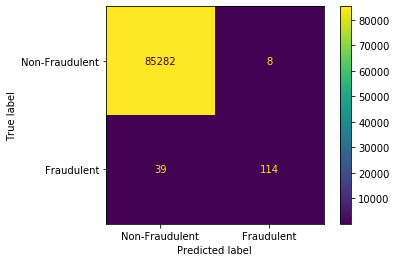

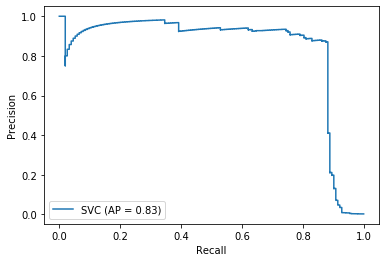

In [22]:
model_results(svc,X_train,y_train,X_test,y_test)